In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve

###### Datas

In [179]:
X , y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    # 20% data_test
    X, y, test_size=0.20, random_state=43
    )

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = LogisticRegression().fit(X_train_scaled, y_train)


print("\nTrain Set Comparison:")
print("Actual    array({})".format(list(y_train[:10])))

print("\nTest Set Comparison:")
print("Actual    array({})".format(list(y_test[:10])))



Train Set Comparison:
Actual    array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0])

Test Set Comparison:
Actual    array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0])


#### 1 - Predict on the train set and test set

In [180]:

y_train_pred_proba = classifier.predict_proba(X_train_scaled)[:, 1]
y_test_pred_proba = classifier.predict_proba(X_test_scaled)[:, 1]

def compute_metrics(y_true, y_pred_proba):
    y_pred = (y_pred_proba > 0.5).astype(int)
    return {
        'F1 Score': f1_score(y_true, y_pred),
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_pred_proba)
    }

train_metrics = compute_metrics(y_train, y_train_pred_proba)
test_metrics = compute_metrics(y_test, y_test_pred_proba)

print("Train set metrics:")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nTest set metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")

Train set metrics:
F1 Score: 0.9912
Accuracy: 0.9890
Precision: 0.9894
Recall: 0.9929
ROC AUC: 0.9990

Test set metrics:
F1 Score: 0.9801
Accuracy: 0.9737
Precision: 0.9737
Recall: 0.9867
ROC AUC: 0.9863


#### Confusion Matrix

In [181]:
y_test_pred = (y_test_pred_proba > 0.5).astype(int)
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix (Test Set):
[[37  2]
 [ 1 74]]


#### 2 - Plot the AUC curve for on the test set using roc_curve of scikit learn. There many ways to create this plot. It should look like this:

In [182]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

#### PLOT

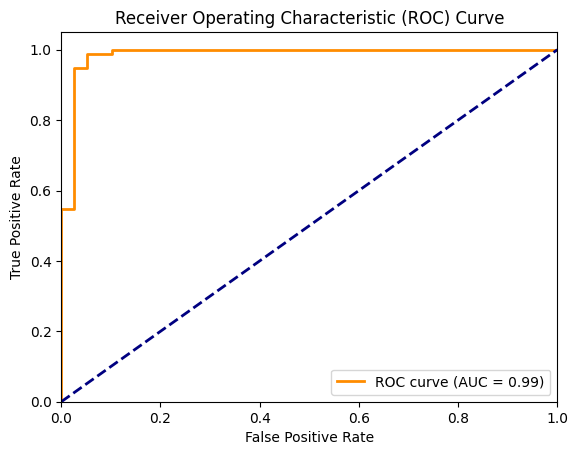

In [183]:

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

def detailed_metrics(y_true, y_pred_proba, threshold=0.5):
    y_pred = (y_pred_proba > threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    
    # Extraction des valeurs
    TN, FP, FN, TP = cm.ravel()
    
    # Calculs détaillés
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    print(f"Matrice de confusion:\n{cm}")
    print(f"\nVrais Positifs (TP): {TP}")
    print(f"Faux Positifs (FP): {FP}")
    print(f"Vrais Négatifs (TN): {TN}")
    print(f"Faux Négatifs (FN): {FN}")
    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")